# ***Flight_Fare_Prediction***

# Introduction

This report provide insights into the dataset for predicting price of flights.

# Dataset Overview

In [1]:
import pandas as pd
df = pd.read_excel('Flight_Fare.xlsx')

In [3]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


# Data Exploration

The dataset goes through Data Cleaning, Data Wrangling, and Exploratory Data Analysis which gives insights about the data and later uses Machine Learning techniques to train the data for prediction. It is a regression problem that is solved using Regressive ML Algorithm which generates accurate results for price prediction.

In [8]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [10]:
df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [12]:
df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [14]:
df.Date_of_Journey.value_counts()

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64

## *Checking for Nullvalues*

In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [19]:
df.Additional_Info.describe()

count       10683
unique         10
top       No info
freq         8345
Name: Additional_Info, dtype: object

In [21]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [23]:
df.Price.describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [25]:
df.Dep_Time.value_counts()

Dep_Time
18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: count, Length: 222, dtype: int64

In [27]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [29]:
df.Arrival_Time.value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

In [31]:
df.Route.value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [33]:
df['Duration'].min()

'10h'

In [35]:
df['Duration'].max()

'9h 5m'

## Inputing Null Values

In [38]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [40]:
df.loc[df['Route'].isnull(),'Route']="DEL → BOM → COK" 

In [42]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [44]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [46]:
df.loc[df['Total_Stops'].isnull(),'Total_Stops']="1 stop" 

In [48]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## *Converting Date_of_Journey into separate day, month, and year columns*

In [53]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")
df["Journey_Day"] = df["Date_of_Journey"].dt.day
df["Journey_Month"] = df["Date_of_Journey"].dt.month
df["Journey_Year"] = df["Date_of_Journey"].dt.year
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [55]:
df

Airline    Source Destination                  Route Dep_Time  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
...            ...       ...         ...                    ...      ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore   New Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

       Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_Day  \
0      01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1             13:15   7h 25m     2 stops         No info   7662            1   
2      04:25 10 Jun      19h     2 stops         No info  13882            9   
3             23:30   5h 25m      1 stop         No info   6218           12   
4             21:35   4h 45m      1 stop         No info  13302            1   
...             ...      ...         ...             ...    ...          ...   
10678         22:25   2h 30m    non-stop         No info   4107            9   
10679         23:20   2h 35m    non-stop         No info   4145           27   
10680         11:20       3h    non-stop         No info   7229           27   
10681         14:10   2h 40m    non-stop         No info  12648            1   
10682         19:15   8h 20m     2 stops         No info  11753            9   

       Journey_Month  Journey_Year  
0                  3          2019  
1                  5          2019  
2                  6          2019  
3                  5          2019  
4                  3          2019  
...              ...           ...  
10678              4          2019  
10679              4          2019  
10680              4          2019  
10681              3          2019  
10682              5          2019  

[10683 rows x 13 columns]

### *eliminating the mixed values within the time*

In [59]:
print(df["Arrival_Time"].head(10))

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
5           11:25
6    10:25 13 Mar
7    05:05 02 Mar
8    10:25 13 Mar
9           19:15
Name: Arrival_Time, dtype: object


In [61]:
df["Arrival_Time"].astype(str).apply(lambda x: len(x)).value_counts()

Arrival_Time
5     6348
12    4335
Name: count, dtype: int64

In [63]:
df["Arrival_Time"] = df["Arrival_Time"].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]

In [65]:
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"], format="%H:%M", errors="coerce")
df["Arrival_Hour"] = df["Arrival_Time"].dt.hour
df["Arrival_Min"] = df["Arrival_Time"].dt.minute

In [67]:
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [69]:
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"], format="%H:%M")
df["Dep_Hour"] = df["Dep_Time"].dt.hour
df["Dep_Min"] = df["Dep_Time"].dt.minute
df.drop(["Dep_Time"], axis=1, inplace=True)

In [72]:
def convert_duration(duration):
    hours, minutes = 0, 0
    parts = duration.split()
    
    for part in parts:
        if "h" in part:
            hours = int(part.replace("h", ""))  # Extract hours
        if "m" in part:
            minutes = int(part.replace("m", ""))  # Extract minutes
            
    return hours * 60 + minutes  # Convert to total minutes

# Apply the function
df["Duration"] = df["Duration"].apply(convert_duration)


In [74]:
df["Total_Stops"] = df["Total_Stops"].replace({
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_5360\741883029.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"] = df["Total_Stops"].replace({


In [76]:
df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], dtype="int",drop_first=True) # One Hot Encoding

In [78]:
df.drop(["Route"], axis=1, inplace=True)
df.drop(["Additional_Info"], axis=1, inplace=True)

In [80]:
df

Duration  Total_Stops  Price  Journey_Day  Journey_Month  Journey_Year  \
0           170            0   3897           24              3          2019   
1           445            2   7662            1              5          2019   
2          1140            2  13882            9              6          2019   
3           325            1   6218           12              5          2019   
4           285            1  13302            1              3          2019   
...         ...          ...    ...          ...            ...           ...   
10678       150            0   4107            9              4          2019   
10679       155            0   4145           27              4          2019   
10680       180            0   7229           27              4          2019   
10681       160            0  12648            1              3          2019   
10682       500            2  11753            9              5          2019   

       Arrival_Hour  Arrival_Min  Dep_Hour  Dep_Min  ...  \
0                 1           10        22       20  ...   
1                13           15         5       50  ...   
2                 4           25         9       25  ...   
3                23           30        18        5  ...   
4                21           35        16       50  ...   
...             ...          ...       ...      ...  ...   
10678            22           25        19       55  ...   
10679            23           20        20       45  ...   
10680            11           20         8       20  ...   
10681            14           10        11       30  ...   
10682            19           15        10       55  ...   

       Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                    0               0             0   
1                                    0               0             0   
2                                    0               0             1   
3                                    0               0             0   
4                                    0               0             0   
...                                ...             ...           ...   
10678                                0               0             0   
10679                                0               0             0   
10680                                0               0             0   
10681                                0               0             0   
10682                                0               0             1   

       Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0                   0              0                   0                  0   
1                   1              0                   0                  0   
2                   0              0                   1                  0   
3                   1              0                   0                  0   
4                   0              0                   0                  0   
...               ...            ...                 ...                ...   
10678               1              0                   0                  0   
10679               1              0                   0                  0   
10680               0              0                   0                  1   
10681               0              0                   0                  0   
10682               0              0                   1                  0   

       Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                          0                    0                      1  
1                          0                    0                      0  
2                          0                    0                      0  
3                          0                    0                      0  
4                          0                    0                      1  
...                      ...                  ...

## checking for Outliers

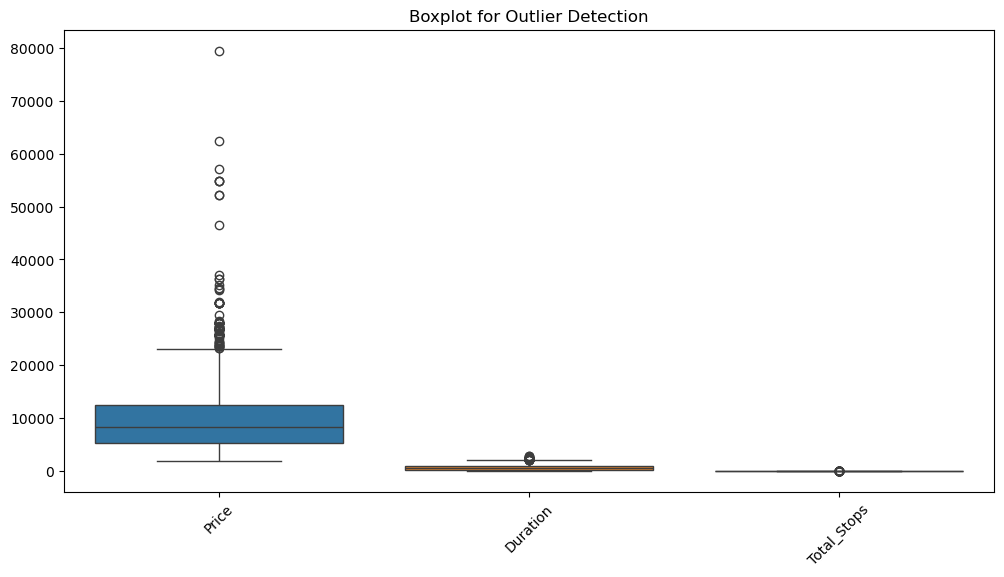

In [83]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Price", "Duration", "Total_Stops"]])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

__Price__

In [86]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in the "Price" column
outliers = detect_outliers_iqr(df, "Price")
print(f"Number of outliers in Price: {len(outliers)}")
outliers.head()


Number of outliers in Price: 94


Duration  Total_Stops  Price  Journey_Day  Journey_Month  Journey_Year  \
123      1215            1  27430            1              3          2019   
396       385            1  36983            1              3          2019   
486       380            1  26890            1              3          2019   
510       325            1  26890            1              3          2019   
597      1775            2  25139            6              3          2019   

     Arrival_Hour  Arrival_Min  Dep_Hour  Dep_Min  ...  \
123            19           15        23        0  ...   
396            19           15        12       50  ...   
486            15           15         8       55  ...   
510            12           25         7        0  ...   
597            15           15         9       40  ...   

     Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
123                                0               0             1   
396                                0               0             1   
486                                0               0             0   
510                                0               0             0   
597                                0               0             0   

     Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
123               0              0                   1                  0   
396               0              0                   1                  0   
486               0              0                   0                  0   
510               0              0                   0                  0   
597               0              1                   0                  0   

     Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
123                      0                    0                      0  
396                      0                    0                      0  
486                      0                    0                      1  
510                      0                    0                      1  
597                      1                    0                      0  

[5 rows x 30 columns]

### Transforming the data using log transformation to reduce skewness

In [89]:
import numpy as np

Q1 = df["Price"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df["Price"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -5367.0, Upper Bound: 23017.0


In [91]:
df["Price"] = np.log1p(df["Price"])

In [93]:
df

Duration  Total_Stops     Price  Journey_Day  Journey_Month  \
0           170            0  8.268219           24              3   
1           445            2  8.944159            1              5   
2          1140            2  9.538420            9              6   
3           325            1  8.735364           12              5   
4           285            1  9.495745            1              3   
...         ...          ...       ...          ...            ...   
10678       150            0  8.320692            9              4   
10679       155            0  8.329899           27              4   
10680       180            0  8.885994           27              4   
10681       160            0  9.445333            1              3   
10682       500            2  9.371949            9              5   

       Journey_Year  Arrival_Hour  Arrival_Min  Dep_Hour  Dep_Min  ...  \
0              2019             1           10        22       20  ...   
1              2019            13           15         5       50  ...   
2              2019             4           25         9       25  ...   
3              2019            23           30        18        5  ...   
4              2019            21           35        16       50  ...   
...             ...           ...          ...       ...      ...  ...   
10678          2019            22           25        19       55  ...   
10679          2019            23           20        20       45  ...   
10680          2019            11           20         8       20  ...   
10681          2019            14           10        11       30  ...   
10682          2019            19           15        10       55  ...   

       Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                    0               0             0   
1                                    0               0             0   
2                                    0               0             1   
3                                    0               0             0   
4                                    0               0             0   
...                                ...             ...           ...   
10678                                0               0             0   
10679                                0               0             0   
10680                                0               0             0   
10681                                0               0             0   
10682                                0               0             1   

       Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0                   0              0                   0                  0   
1                   1              0                   0                  0   
2                   0              0                   1                  0   
3                   1              0                   0                  0   
4                   0              0                   0                  0   
...               ...            ...                 ...                ...   
10678               1              0                   0                  0   
10679               1              0                   0                  0   
10680               0              0                   0                  1   
10681               0              0                   0                  0   
10682               0              0                   1                  0   

       Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                          0                    0                      1  
1                          0                    0                      0  
2                          0                    0                      0  
3                          0                    0                      0  
4                          0                    0                      1  
...          

# *Exploratory Data Analysis*

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline
warnings.filterwarnings('ignore')

In [97]:
df.head()

Duration  Total_Stops     Price  Journey_Day  Journey_Month  Journey_Year  \
0       170            0  8.268219           24              3          2019   
1       445            2  8.944159            1              5          2019   
2      1140            2  9.538420            9              6          2019   
3       325            1  8.735364           12              5          2019   
4       285            1  9.495745            1              3          2019   

   Arrival_Hour  Arrival_Min  Dep_Hour  Dep_Min  ...  \
0             1           10        22       20  ...   
1            13           15         5       50  ...   
2             4           25         9       25  ...   
3            23           30        18        5  ...   
4            21           35        16       50  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

In [100]:
profile=ProfileReport(df,title="EDA",explorative=False)

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [107]:
df.describe()

Duration   Total_Stops         Price   Journey_Day  Journey_Month  \
count  10683.000000  10683.000000  10683.000000  10683.000000   10683.000000   
mean     643.093232      0.824207      8.989287     13.508378       4.708602   
std      507.862001      0.675199      0.513533      8.479277       1.164357   
min        5.000000      0.000000      7.473069      1.000000       3.000000   
25%      170.000000      0.000000      8.571303      6.000000       3.000000   
50%      520.000000      1.000000      9.032768     12.000000       5.000000   
75%      930.000000      1.000000      9.423353     21.000000       6.000000   
max     2860.000000      4.000000     11.283676     27.000000       6.000000   

       Journey_Year  Arrival_Hour   Arrival_Min      Dep_Hour       Dep_Min  \
count       10683.0  10683.000000  10683.000000  10683.000000  10683.000000   
mean         2019.0     13.348778     24.690630     12.490686     24.411214   
std             0.0      6.859125     16.506036      5.748650     18.767980   
min          2019.0      0.000000      0.000000      0.000000      0.000000   
25%          2019.0      8.000000     10.000000      8.000000      5.000000   
50%          2019.0     14.000000     25.000000     11.000000     25.000000   
75%          2019.0     19.000000     35.000000     18.000000     40.000000   
max          2019.0     23.000000     55.000000     23.000000     55.000000   

       ...  Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
count  ...                     10683.000000    10683.000000  10683.000000   
mean   ...                         0.000281        0.035664      0.424693   
std    ...                         0.016756        0.185460      0.494320   
min    ...                         0.000000        0.000000      0.000000   
25%    ...                         0.000000        0.000000      0.000000   
50%    ...                         0.000000        0.000000      0.000000   
75%    ...                         0.000000        0.000000      1.000000   
max    ...                         1.000000        1.000000      1.000000   

       Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
count    10683.000000   10683.000000        10683.000000       10683.000000   
mean         0.268745       0.065244            0.424693           0.118412   
std          0.443328       0.246967            0.494320           0.323111   
min          0.000000       0.000000            0.000000           0.000000   
25%          0.000000       0.000000            0.000000           0.000000   
50%          0.000000       0.000000            0.000000           0.000000   
75%          1.000000       0.000000            1.000000           0.000000   
max          1.000000       1.000000            1.000000           1.000000   

       Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
count           10683.000000         10683.000000           10683.000000  
mean                0.065244             0.035664               0.087241  
std                 0.246967             0.185460               0.282202  
min                 0.000000             0.000000               0.000000  
25%                 0.000000             0.000000               0.000000  
50%                 0.000000             0.000000               0.000000  
75%                 0.000000             0.000000               0.000000  
max                 1.000000             1.000000               1.000000  

[8 rows x 30 columns]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Duration                                   10683 non-null  int64  
 1   Total_Stops                                10683 non-null  int32  
 2   Price                                      10683 non-null  float64
 3   Journey_Day                                10683 non-null  int32  
 4   Journey_Month                              10683 non-null  int32  
 5   Journey_Year                               10683 non-null  int32  
 6   Arrival_Hour                               10683 non-null  int32  
 7   Arrival_Min                                10683 non-null  int32  
 8   Dep_Hour                                   10683 non-null  int32  
 9   Dep_Min                                    10683 non-null  int32  
 10  Airline_Air India     

In [111]:
df

Duration  Total_Stops     Price  Journey_Day  Journey_Month  \
0           170            0  8.268219           24              3   
1           445            2  8.944159            1              5   
2          1140            2  9.538420            9              6   
3           325            1  8.735364           12              5   
4           285            1  9.495745            1              3   
...         ...          ...       ...          ...            ...   
10678       150            0  8.320692            9              4   
10679       155            0  8.329899           27              4   
10680       180            0  8.885994           27              4   
10681       160            0  9.445333            1              3   
10682       500            2  9.371949            9              5   

       Journey_Year  Arrival_Hour  Arrival_Min  Dep_Hour  Dep_Min  ...  \
0              2019             1           10        22       20  ...   
1              2019            13           15         5       50  ...   
2              2019             4           25         9       25  ...   
3              2019            23           30        18        5  ...   
4              2019            21           35        16       50  ...   
...             ...           ...          ...       ...      ...  ...   
10678          2019            22           25        19       55  ...   
10679          2019            23           20        20       45  ...   
10680          2019            11           20         8       20  ...   
10681          2019            14           10        11       30  ...   
10682          2019            19           15        10       55  ...   

       Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                    0               0             0   
1                                    0               0             0   
2                                    0               0             1   
3                                    0               0             0   
4                                    0               0             0   
...                                ...             ...           ...   
10678                                0               0             0   
10679                                0               0             0   
10680                                0               0             0   
10681                                0               0             0   
10682                                0               0             1   

       Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0                   0              0                   0                  0   
1                   1              0                   0                  0   
2                   0              0                   1                  0   
3                   1              0                   0                  0   
4                   0              0                   0                  0   
...               ...            ...                 ...                ...   
10678               1              0                   0                  0   
10679               1              0                   0                  0   
10680               0              0                   0                  1   
10681               0              0                   0                  0   
10682               0              0                   1                  0   

       Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                          0                    0                      1  
1                          0                    0                      0  
2                          0                    0                      0  
3                          0                    0                      0  
4                          0                    0                      1  
...          

## Preprocessing

In [114]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Arrival_Hour', 'Arrival_Min', 'Dep_Hour', 'Dep_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [116]:
X = df.loc[:, ['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Arrival_Hour', 'Arrival_Min', 'Dep_Hour', 'Dep_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

Duration  Total_Stops     Price  Journey_Day  Journey_Month  Journey_Year  \
0       170            0  8.268219           24              3          2019   
1       445            2  8.944159            1              5          2019   
2      1140            2  9.538420            9              6          2019   
3       325            1  8.735364           12              5          2019   
4       285            1  9.495745            1              3          2019   

   Arrival_Hour  Arrival_Min  Dep_Hour  Dep_Min  ...  \
0             1           10        22       20  ...   
1            13           15         5       50  ...   
2             4           25         9       25  ...   
3            23           30        18        5  ...   
4            21           35        16       50  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

In [118]:
y = df.iloc[:, 1]
y.head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int32

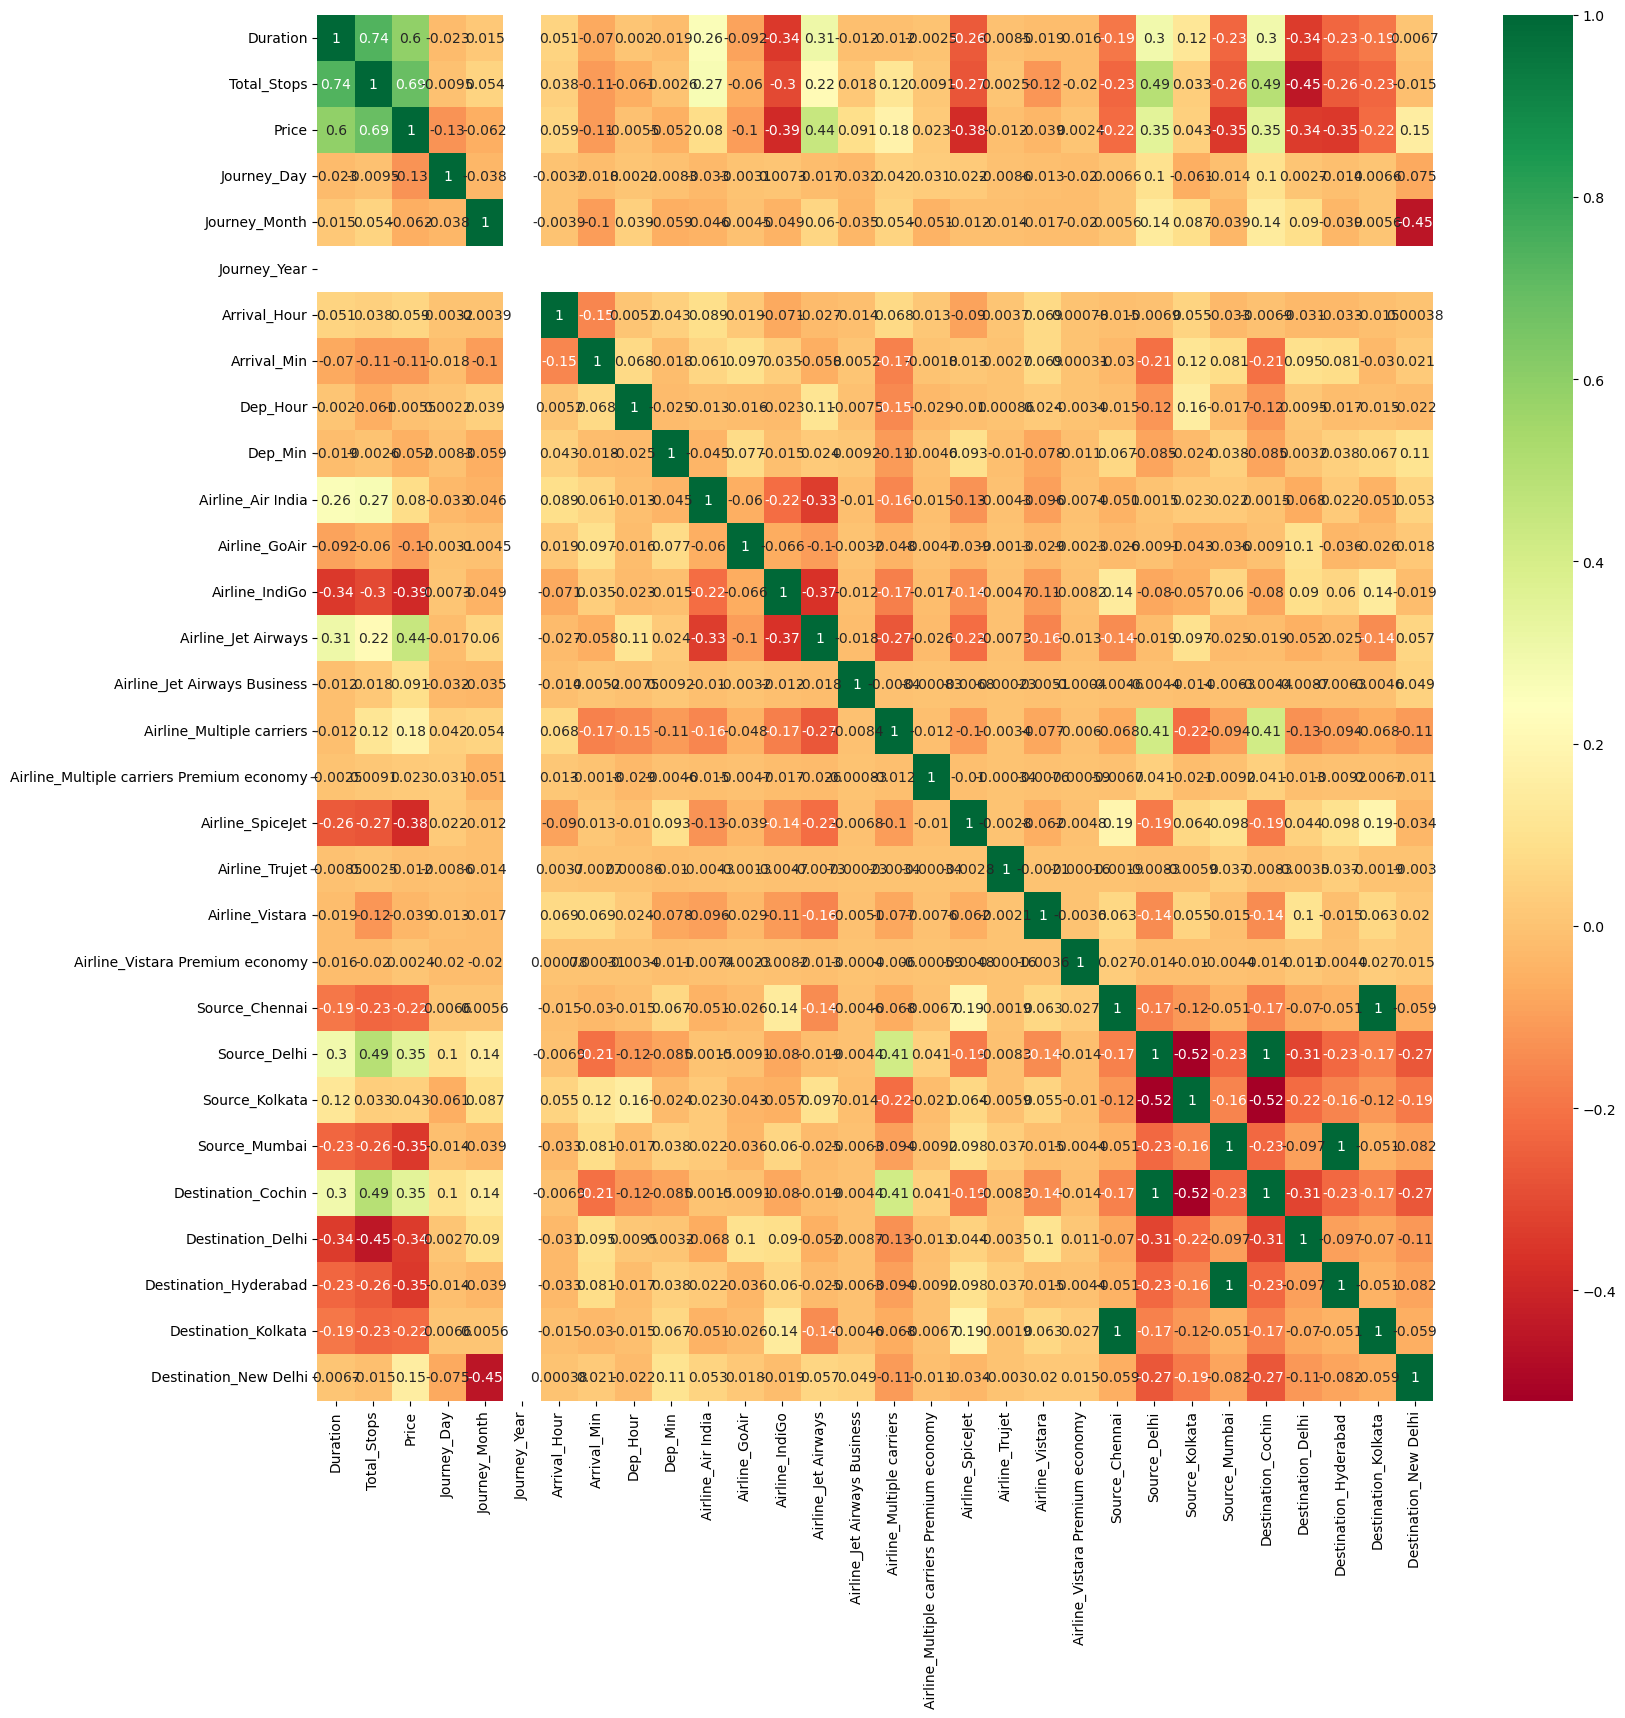

In [120]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [122]:
from sklearn.ensemble import RandomForestRegressor

selection = RandomForestRegressor()
selection.fit(X, y)

RandomForestRegressor()

In [124]:
print(selection.feature_importances_)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


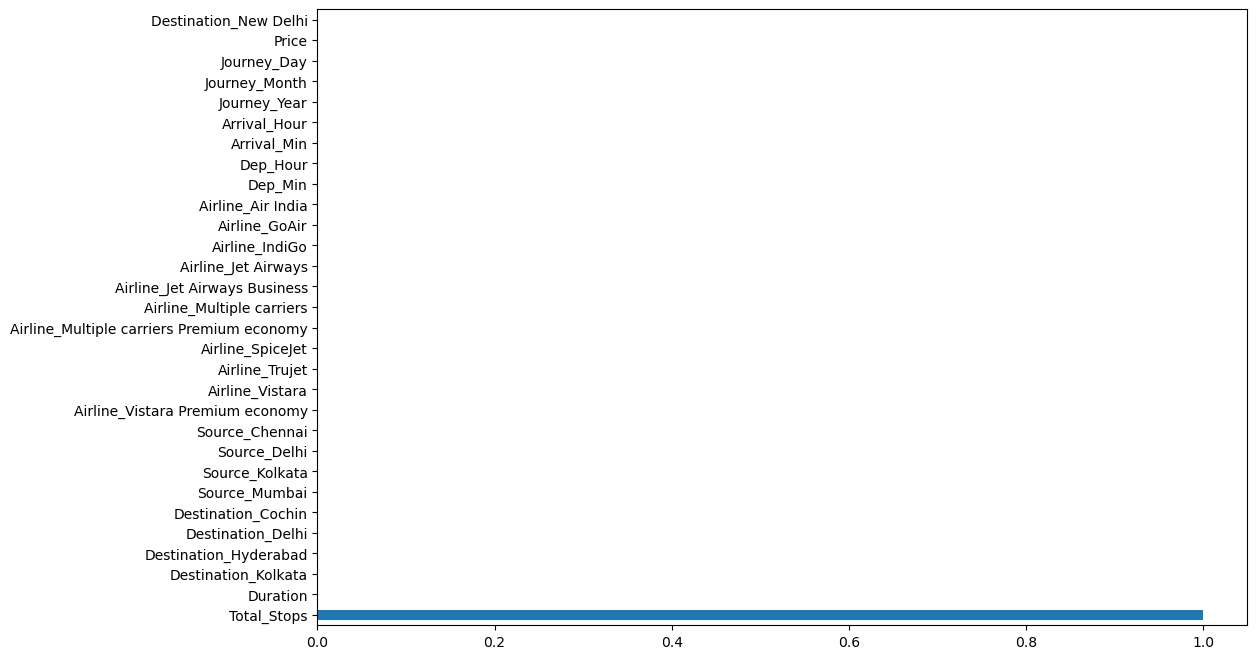

In [126]:
plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [128]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(X)

data1[0]

array([-0.93158255, -1.22074373,  1.23738294, -1.46749009,  0.        ,
       -1.80042732, -0.8900573 ,  1.65425948, -0.23505036, -0.44291155,
       -0.13599841,  2.05026937, -0.75047541, -0.0237056 , -0.3550595 ,
       -0.03490515, -0.28795731, -0.00967551, -0.21666189, -0.01676004,
       -0.19230993, -0.85918782, -0.60622728, -0.26419258, -0.85918782,
       -0.3664932 , -0.26419258, -0.19230993,  3.23457051])

In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7478, 29), (3205, 29), (7478,), (3205,))

# *Linear Regression Model* 

In [135]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [137]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [139]:
y_pred = model.predict(X_test)

In [141]:
metrics(y_test, y_pred)

RMSE: 0.27389617828009494
R_Squared_Value: 0.711883334601638


In [143]:
accuracy(y_test, y_pred)

97.70352570667558

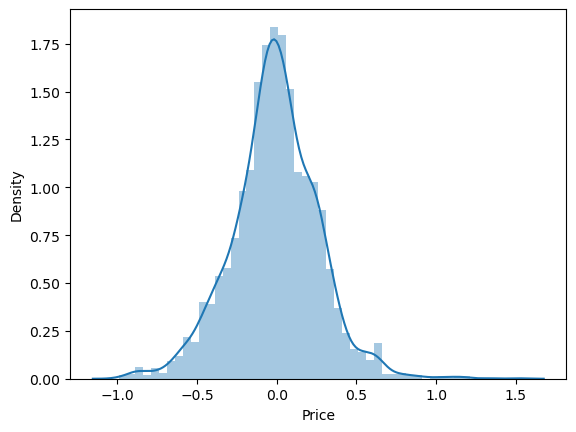

In [145]:
sns.distplot(y_test-y_pred)
plt.show()

# *XG Boost Model* 

In [148]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

xgb_r.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [150]:
pred = xgb_r.predict(X_test)

In [152]:
metrics(y_test, pred)

RMSE: 0.19794308950856648
R_Squared_Value: 0.8495205747989217


In [154]:
accuracy(y_test, pred)

98.29083530837067

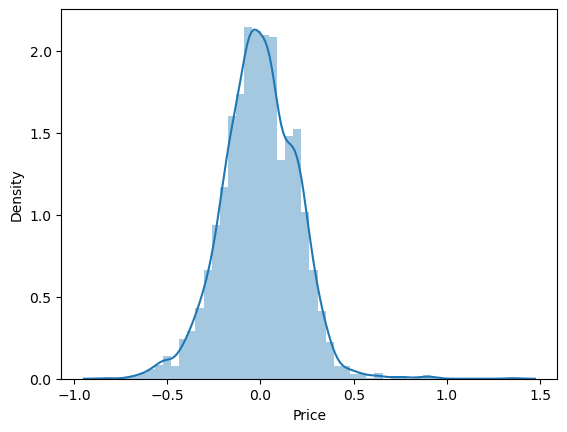

In [156]:
sns.distplot(y_test-pred)
plt.show()

# *Random Forest Model* 

In [159]:
selection = RandomForestRegressor()
selection.fit(X_train, y_train)

RandomForestRegressor()

In [161]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [163]:
y_pred = selection.predict(X_test)

In [165]:
metrics(y_test, y_pred)

RMSE: 0.18845157832729262
R_Squared_Value: 0.8636057717156661


In [167]:
accuracy(y_test, y_pred)

98.63222032940271

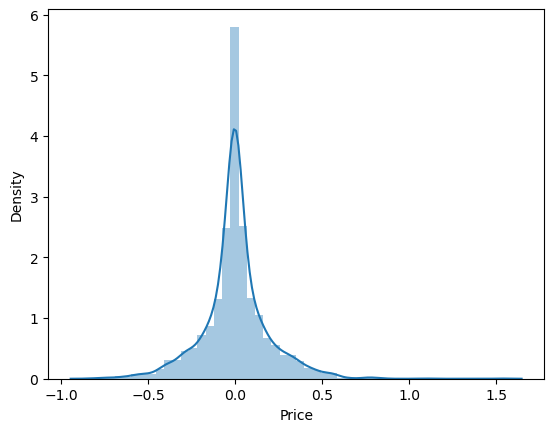

In [169]:
sns.distplot(y_test-y_pred)
plt.show()

## Evaluating the Model

Text(0.5, 1.0, 'Actual VS Predicted')

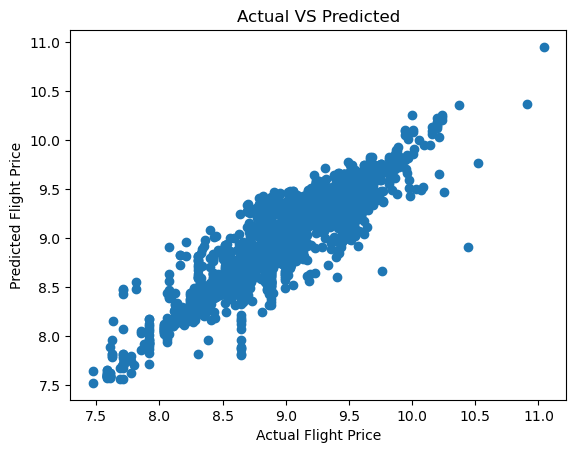

In [172]:
 import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual VS Predicted')

## Hyperparameter Tuning using GridSearchCV

In [176]:
from sklearn.model_selection import GridSearchCV
reg = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto','sqrt']
      
}  
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [178]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.8655
Mean Absolute Error: 0.13


In [180]:
def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [182]:
y_pred = best_model.predict(X_test)

In [184]:
metrics(y_test, y_pred)

RMSE: 0.1871632849202849
R_Squared_Value: 0.8654642350105136


In [186]:
accuracy(y_test, y_pred)

98.52897261542815

## Hyperparameter Tuning using RandomizedSearchCV

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dict ={
     'n_estimators': randint(100,300),
    'max_depth': [None,10,20,30,40,50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0,'auto','sqrt']
      
}
reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dict, n_iter=2, 
                          cv=3 , scoring='r2', n_jobs=-1, verbose=2,random_state=10)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [191]:
best_regressor.score(X_test,y_test)

0.876475384100889

In [193]:
def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [195]:
y_pred = best_regressor.predict(X_test)

In [197]:
metrics(y_test, y_pred)

RMSE: 0.17934056709857615
R_Squared_Value: 0.876475384100889


In [199]:
accuracy(y_test, y_pred)

98.67636416079011

In [201]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

y_pred = best_regressor.predict(X_test)

print('R2:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.876475384100889
MAE: 0.11937753336854294
MSE: 0.03216303900723891
RMSE: 0.17934056709857618


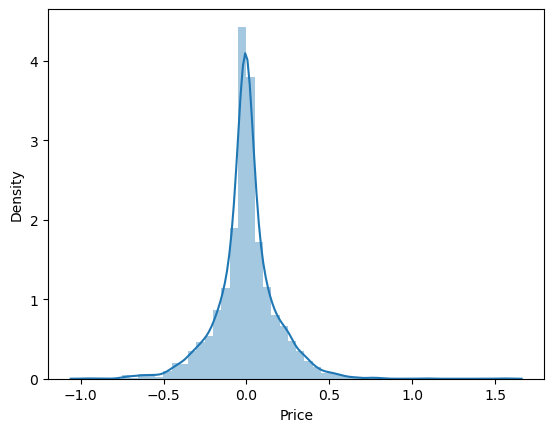

In [203]:
sns.distplot(y_test-y_pred)
plt.show()

## Saving the file

In [206]:
model = best_regressor
pickle.dump(model, open("flight_fare.pkl",'wb'))

# Conclusion

This project successfully developed a flight fare prediction model using machine learning techniques. The dataset under went extensive preprocessing, including handling missing values and feature encoding. Three models, XG boost,Linear Regression and Random Forest Regressor, were trained and evaluated using RMSE and R² score.The study demonstrated that Random forest Regressor outperformed XG boost(98.29%) and Linear regresion(97.70%) in flight fare prediction, achieving a higher accuracy of 98.64%.The Accuracy of the model improved further by perfroming hyperparametric tuning by RandomisedSearch CV(98.678%) .The model's performance indicates that machine learning can effectively predict flight fares based on various flight parameters.

__Future Improvements :__
*Incorporating additional features such as real-time demand and airline pricing trends.
*Ensemble Learning: Combining both models (Random forest Regressor + XG boost) for improved robustness.